$f(t)=\cos(2 \pi t/T)$

# Initial library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
from scipy.integrate import odeint,quad
from scipy.stats import kde,beta
import seaborn as sns
from importlib import reload
pi=np.pi
from scipy.optimize import brentq

#from numpy import linalg as LA
from scipy.linalg import expm # calculate the exponential matrix.
from scipy.linalg import eig

import seaborn as sns
from importlib import reload
pi=np.pi
from scipy.optimize import brentq
from numpy import linalg as LA
from scipy.linalg import expm
from scipy import interpolate
from scipy.integrate import quad, dblquad
from scipy import integrate
import string

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

##  Model I':   Draw population model

In [2]:
def NVab(delta=1,T=10,epsilon=0.5):
    def f(t):
        return(np.cos(2*pi*t/T)) 
    def NVa(t):
        return(1+epsilon*f(t)*delta)
    def NVb(t):
        return(np.exp(epsilon*f(t)*delta))
    time=np.linspace(0,2*T,T*100)
    meanvb=integrate.quad(lambda t: NVb(t),0,T)[0]/T 
    NVa_value_av=np.zeros(len(time)) +integrate.quad(lambda t: NVa(t),0,T)[0]/T  
    NVb_value_av=np.zeros(len(time)) + meanvb
    NVa_value=np.zeros(len(time))
    NVb_value=np.zeros(len(time))
#    print("Gia tri cua tich phan",integrate.quad(lambda t: NVa(t),0,T)[0]/T)  #1+epsilon*f(t)*delta 
    for i in range(len(time)):
        NVa_value[i]=NVa(time[i])
        NVb_value[i]=NVb(time[i])
    fig,ax=plt.subplots()
    l1=plt.plot(time,NVa_value   ,"b-")#
    plt.plot(time,NVa_value_av,"b--")# ,label="$<N_V^{(I)}>$"
    l2=plt.plot(time,NVb_value   ,"c-")# ,label="$N_V^{(I^{\prime})}$")
    plt.plot(time,NVb_value_av,"c--")#,label="$<N_V^{(I^{\prime})}>$"
    plt.annotate("$<N_V^{(I)}>= N_V(0)$", xy=(2*T, 1), xytext=(2*T+1/T, 1))   
#    plt.annotate("$<N_V^{(I)}>$", xy=(20, 1), xytext=(20, 1),   arrowprops=dict(arrowstyle="->"))    
    plt.annotate("$<N_V^{(I^{\prime})}>$", xy=(2*T, meanvb), xytext=(2*T+1/T, meanvb))    
#    plt.annotate("$<N_V^{(I^{\prime})}>$", xy=(20, meanvb), xytext=(21, meanvb),   arrowprops=dict(arrowstyle="->"))    
    plt.ylabel('$N_V$')
    plt.xlabel('Time')
    l=0
    plt.axvline(x=(l+1/4)*T, color='black', linewidth=0.8)
    plt.axvline(x=(l+1/2)*T, color='black', linewidth=0.8)
    plt.axvline(x=(l+1)*T, color='black', linewidth=0.8)
    sticklabel = ['0','T/4', 'T/2','T', '2T']
    stick=[l*T,(l+1/4)*T,(l+1/2)*T , (l+1)*T, (l+2)*T]
    ax.set_xlim([l*T,(l+2)*T])
    ax.set_xticks(stick)
    ax.set_xticklabels(sticklabel)
    
    
#    plt.grid()
#    plt.legend()
#    plt.title("T="+str(T))
    plt.xlim([0,2*T])
#    plt.title("The varying population in  : $\epsilon$=+str(epsilon) +str(, $\N_V$=1)")
#    plt.title("The total population for  $\epsilon$= "+str(epsilon)+str( ", $N_V(0) $=1, T=10,  f(t)=$\sin(2\pi t)$")  )
    plt.savefig("NVab.pdf", bbox_inches='tight')
    plt.savefig("NVab.jpg", bbox_inches='tight')

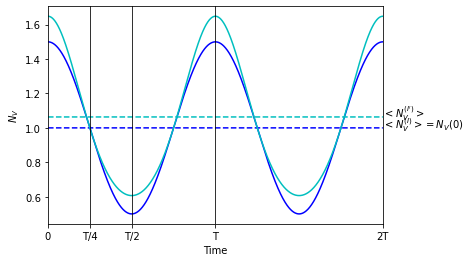

In [3]:
NVab(delta=1,T=20,epsilon=0.5)

# Simulate the frequencies 

In general we set $f(t)=\cos(2\pi t/T)$
In model
\begin{align}
  N_{V}(t) = N_V(0) (1 +\epsilon \, C_{I} f(t)) &\text{ Model I} \\
  a(t) = a_0 (1 +\epsilon, C_{II} f(t)) & \text{ Model II}  \\
  N_{V}(t) = N_{V}(0) \exp \left(\epsilon C_{I} f(t) \right) & \text{ Model I'}
\end{align}
In model I, 
    \begin{align}
        \rho_{V}=\mu_{V} + \dfrac{\dot{N}_{V}}{N_{V}(t)}
                =\mu_{V}- \epsilon C_{I}\dfrac{2\pi}{T} \dfrac{\sin \left( 2\pi t/T\right)}{1+\epsilon C_{I} f(t)}
    \end{align}

In model I',
    \begin{align}
        \rho_{V}=\mu_{V} -\epsilon C_{I} \dfrac{2\pi t}{T} \sin \left( \dfrac{2\pi  }{T}\right)
    \end{align}

Simulating the figure with 
* $I_{H}$ solid blue curve
* $I_{V}$ solid orange curve
* $N_{V}$ dashed blue curse
* $a(t)$ dashed orange curse

\begin{aligned}
    \frac{\text{d}S_H}{\text{d}t} &= \theta- a\beta_{VH} \frac{I_V S_H}{N_H} -\mu_{H}S_{H},\ \\
    \frac{\text{d}I_H}{\text{d}t} &= a \beta_{VH} \frac{I_V S_H}{N_H}- (\mu_H + r_H)
I_H ,\ \\
    \frac{\text{d}R_H}{\text{d}t} &= r_H I_H -\mu_H R_H,\  \\
    \frac{\text{d}S_V}{\text{d}t} &= \rho_V N_V - a \beta_{HV} I_H S_V - \mu_V S_V,\ \\
    \frac{\text{d}I_V}{\text{d}t} &= a \beta_{HV} I_H S_V -\mu_V I_V ,\
\end{aligned}
$\theta=\mu_{H}\left(S_{H}+I_{H}+R_{H}\right)$.

## Model I

In [4]:
#19/10/2021
# We assume N_H=1
#a(t):=a*beta_{HV}
#ra=beta_{VH}/beta_{HV}

#bta=a*muvh
#betaprime=a*muhv
import matplotlib.ticker as ticker

w=2*np.pi
l=500
k=l+2
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 10,
        }

def rossmalariaIb(epsilon=1,muv=1,muh=1,delta=1,bprime=1,rh=1, T=1,a0=1,ra=2):
    widthline=0.8
    def f(t):
        return(np.cos(2*pi*t/T))  
    def rho(t):                                                        # Malaria model 
        return(muv-epsilon*delta*(w/T)*(np.sin(w*t))/(1+epsilon*delta*f(t)))
    def NV(t):
        return(1+epsilon*f(t)*delta)
    def a(t):
        return(a0*(1+epsilon*f(t)*bprime))        

    def msisi(x,t):   # The original system 
        return(-ra*a(t)*x[4]*x[0]+muh*(x[1]+x[2]),
               ra*a(t)*x[4]*x[0]-(muh+rh)*x[1],
               rh*x[1]-muh*x[2],
               rho(t)*(x[3]+x[4])-muv*x[3]-a(t)*x[1]*x[3],
               -muv*x[4]+a(t)*x[1]*x[3])

    step=0.0001
    time=np.arange(0,l*T,step)
    timee=np.arange(l*T,k*T,step)
    a_value=np.zeros(len(timee))
    NV_value=np.zeros(len(timee))
    for i in range(len(timee)):
        a_value[i]=a(timee[i])
        NV_value[i]=NV(timee[i])
    timerad=np.linspace(0,T,T*100)
    
    y0=[0.5,0.4,0.1,0.6,0.4]                      # Initial condition ( initial values)
#    z0=np.array(odeint(msisi,y0,time))      # Solution of the system with initial condition y0
    z0=np.array(odeint(msisi,y0,time))      # Solution of the system with initial condition y0
    y1=[z0[-1,0],z0[-1,1],z0[-1,2],z0[-1,3],z0[-1,4]]   #   Initial condition with the interval time starting from l*T
    z1=np.array(odeint(msisi,y1,timee))     # Solution of the system with initial condition y1 during interval time "timee"
#    print(z0)
    R0cst=ra/(muv*(muh+rh))
    ihcst=(R0cst-1)/((1+rh/muh)*R0cst+1/muv)
    print("I_{H}=",ihcst)
    print("$R_{0}=$",R0cst)
    see=1
    see2=1
    see1=0
    if see:
        fig,ax=plt.subplots()
#        plt.plot(time,z0[:,0],label='Suseptible host')
        plt.plot(time,z0[:,1],label='Infected host')
#        plt.plot(time,z0[:,2],label='Recovered host')        
#        plt.plot(time,z0[:,3],'b--',label='Suseptible vector')
        plt.plot(time,z0[:,4],'y--',label='Infected vector')
        plt.plot(time,NV(time),label="Vector population")
        plt.plot(time,np.zeros(len(time))+ihcst, label='$I_{H}$ theory')
#        plt.plot(time,z0[:,4]+z0[:,3],'r--',label='Number of vector')
        plt.legend()
#        plt.ylim([0,0.4])
        plt.grid()
        
    if see2:
        fig,lax=plt.subplots(figsize=(5.5,4))
        plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.32, 
                hspace=0.4)
        ax=lax
        ihmean=0
        ivmean=0
        for i in range(len(timee)):
            ihmean=ihmean+z1[i,1]
            ivmean=ivmean+z1[i,4]
        ihmean=ihmean/len(timee)
        ivmean=ivmean/len(timee)
#        plt.plot(timee,z1[:,0])
        ax.plot(timee,1+(z1[:,1]-ihmean)*3500,color='gray',label='$I_{H}^{G}$',linewidth=widthline)        
#        ax.text((l+1/2-0.1)*T, 1.5, r'$I_{H}$', fontdict=font)
        
        ax.plot(timee,np.zeros(len(timee))+1, 'k', linewidth=widthline)

        ax.plot(timee,1+(z1[:,4]-ivmean)*100,"--",color='gray',label='$I_{V}^{G}$',linewidth=widthline)
#        ax.text((l+0.25-0.08)*T, 1.5, r'$I_{V}$', fontdict=font)
        
        ax.plot(timee,NV(timee), 'k', label="$\dfrac{N_{V}}{<N_{V}>}$", linewidth=widthline)
#        ax.text((l)*T, 1.5, r'$N_{V}$', fontdict=font)
#        plt.xlim(10,50)
#        plt.ylim(0,0.002)
        ax.legend(loc=1)
#        ax.grid()
        plt.axvline(x=(l+1/4)*T, color='black', linewidth=widthline)
        plt.axvline(x=(l+1/2)*T, color='black', linewidth=widthline)
        plt.axvline(x=(l+1)*T, color='black', linewidth=widthline)
        sticklabel = ['0','T/4', 'T/2','T', '2T']
        stick=[l*T,(l+1/4)*T,(l+1/2)*T , (l+1)*T, (l+2)*T]
        ax.set_xlim([l*T,(l+2)*T])
        ax.set_xticks(stick)
        ax.set_xticklabels(sticklabel)
        ax.set_xlabel("Time")
        ax.set_ylabel("Densities")
        
#        sticklabel=['0','T/4','T/2' ,'T', '3T/2','2T']
#        stick=[l*T,(l+0.25)*T ,(l+0.5)*T,(l+1)*T,(l+1.5)*T, (l+2)*T]
#        ax.set_xticks(stick)
#        ax.set_xticklabels(sticklabel)
        ax.text(-0.1, 1.1, string.ascii_uppercase[0]+"",transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase
        plt.savefig("showIa.pdf",bbox_inches='tight' );

        fig, lax=plt.subplots(figsize=(5.5,4))
        ax=lax
        ax.plot( NV(timee),z1[:,1],'k',linewidth=widthline)
#        ax.yaxis.set_major_locator(MultipleLocator(0.00025)) #0.00025
#        ax.yaxis.set_major_formatter(FormatStrFormatter('% 1.4f'))
        ax.set_ylabel("$I_{H}^*$")
        ax.set_xlabel("$N_{V}$")
        p1 = [NV(l*T),z1[0,1]]
        posi=len(timee)
        posi=posi //4
        p2 = [NV((l+0.5)*T),z1[posi,1]]
        x, y = [p1[0], p2[0]], [p1[1], p2[1]]
        value1=0
        for i in range(len(timee)):
            value1=value1+z1[i,1]
        value1=value1/len(timee)
        ax.axhline(y=value1,linestyle='--', color='black', linewidth=widthline)
        ax.axline((NV(l*T), z1[0,1]), slope=(z1[posi,1]-z1[0,1])/(NV((l+0.5)*T)-NV(l*T)), color="black", linewidth=widthline)
        ax.plot(x,y,color='black',linewidth=widthline)
        ax.set_title("$Cov(I_{H}^*,N_{V})<0$")
        
        ax.axes.xaxis.set_visible(True)
        ax.tick_params(axis='y', which='both', labelleft=True, labelright=False)      
        
        ax.text(-0.1, 1.1, string.ascii_uppercase[1]+"",transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase

        plt.savefig("showIb.pdf",bbox_inches='tight' );
        
    if see1:
        fig, ax=plt.subplots()
        plt.plot(time, z0[:,0], label="$I_{H}$")
        plt.plot(time, z0[:,4], label="$I_{V}$")
        plt.plot(time, z0[:,3], label="$S_{V}$")
        plt.xlim([10*T,14*T])
        plt.legend()

I_{H}= 0.0801080108010801
$R_{0}=$ 9.090909090909092


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


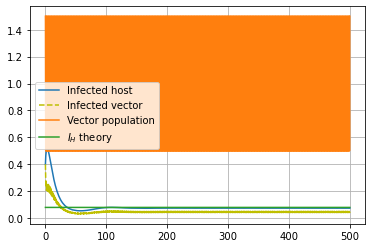

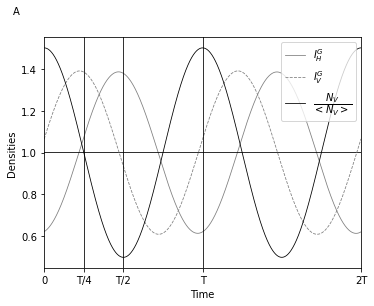

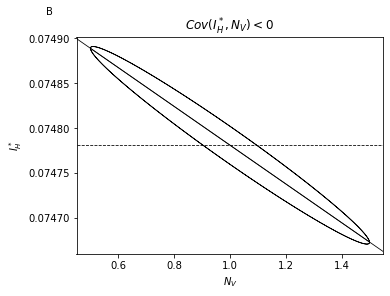

In [5]:
rossmalariaIb(epsilon=0.5,muv=1,muh=0.01,delta=1,bprime=0,rh=0.1, T=1,a0=1,ra=1) 
#rossmalariaIb(epsilon=0,muv=1,muh=0.1,delta=1,bprime=0,rh=0.1, T=1,a0=1,ra=1) 

## Model I'

In [6]:
#19/10/2021
# We assume N_H=1
#a(t):=a*beta_{HV}
#ra=beta_{VH}/beta_{HV}

#bta=a*muvh
#betaprime=a*muhv
w=2*np.pi
l=400
k=l+2

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

def rossmalariamerge(epsilon=1,muv=1,muh=1,delta=1,bprime=1,rh=1, T=1,a0=1,ra=2):
    widthline=0.8
    def f(t):
        return(np.cos(2*pi*t/T))  
    def rho(t):                                                        # Malaria model 
        return(muv-epsilon*delta*(w/T)*(np.sin(w*t)))
    def NV(t):
        return np.e**(epsilon*f(t)*delta)
    def a(t):
        return(a0*(1+epsilon*f(t)*bprime))        

    def msisi(x,t):   # The original system 
        return(-ra*a(t)*x[4]*x[0]+muh*(x[1]+x[2]),
               ra*a(t)*x[4]*x[0]-(muh+rh)*x[1],
               rh*x[1]-muh*x[2],
               rho(t)*(x[3]+x[4])-muv*x[3]-a(t)*x[1]*x[3],
               -muv*x[4]+a(t)*x[1]*x[3])

    step=0.0002
    time=np.arange(0,l*T,step)
    timee=np.arange(l*T,k*T,step)
    a_value=np.zeros(len(timee))
    NV_value=np.zeros(len(timee))
    for i in range(len(timee)):
        a_value[i]=a(timee[i])
        NV_value[i]=NV(timee[i])
    timerad=np.linspace(0,T,T*100)
    
    y0=[0.5,0.4,0.1,0.6,0.4]                      # Initial condition ( initial values)
#    z0=np.array(odeint(msisi,y0,time))      # Solution of the system with initial condition y0
    z0=np.array(odeint(msisi,y0,time))      # Solution of the system with initial condition y0
    y1=[z0[-1,0],z0[-1,1],z0[-1,2],z0[-1,3],z0[-1,4]]   #   Initial condition with the interval time starting from l*T
    z1=np.array(odeint(msisi,y1,timee))     # Solution of the system with initial condition y1 during interval time "timee"
#    print(z0)
    see=1;
    if see:
        see22=1
        if see22:
            fig,ax=plt.subplots()
    #        plt.plot(time,z0[:,0],label='Suseptible host')
            plt.plot(time,z0[:,1],label='Infected host')
    #        plt.plot(time,z0[:,2],label='Recovered host')        
    #        plt.plot(time,z0[:,3],'b--',label='Suseptible vector')
            plt.plot(time,z0[:,4],'y--',label='Infected vector')
            plt.plot(time,NV(time),label="Vector population")
    #        plt.plot(time,z0[:,4]+z0[:,3],'r--',label='Number of vector')
            plt.legend()
            plt.grid()
        
        fig,lax= plt.subplots() #(ncols=2, figsize=(6.2,2))
        plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.32, 
                hspace=0.4)
        ax=lax #[0]
#        plt.plot(timee,z1[:,0])
        ihmean=0
        ivmean=0
        nvmean=0
        for i in range(len(timee)):
            ihmean=ihmean+z1[i,1]
            ivmean=ivmean+z1[i,4]
            nvmean=nvmean+NV(timee[i])
        ihmean=ihmean/len(timee)
        ivmean=ivmean/len(timee)
        nvmean=nvmean/len(timee)
        print(ihmean,ivmean,nvmean)
        ax.plot(timee,1+(z1[:,1]-ihmean)*6000,color='gray',label='$I_{H}^{G}$', linewidth=widthline)
#        ax.text((l+0.45)*T, 1.65, r'$I_{H}$', fontdict=font)

        ax.plot(timee,1+(z1[:,4]-ivmean)*150,'--',color='gray',label='$I_{V}^{G}$', linewidth=widthline)
#        ax.plot(timee,0+(z1[:,4]/ivmean)*1,'y--',label='$\dfrac{I_{V}}{<I_{V}>}$')
#        ax.text((l+0.2)*T, 1.65, r'$I_{V}$', fontdict=font)

        ax.plot(timee,NV(timee),'k', label="$\dfrac{N_{V}}{<N_{V}>}$", linewidth=widthline)
#        ax.text((l)*T, 1.65, r'$N_{V}$', fontdict=font)
        ax.plot(timee,np.zeros(len(timee))+1, 'k', linewidth=widthline)

        plt.axvline(x=(l+1/4)*T, color='black', linewidth=widthline)
        plt.axvline(x=(l+1/2)*T, color='black', linewidth=widthline)
        plt.axvline(x=(l+1)*T, color='black', linewidth=widthline)
        sticklabel = ['0','T/4', 'T/2','T', '2T']
        stick=[l*T,(l+1/4)*T,(l+1/2)*T , (l+1)*T, (l+2)*T]
        ax.set_xticks(stick)
        ax.set_xticklabels(sticklabel)
        ax.set_xlabel("Time")
        ax.set_ylabel("Densities")
        ax.set_xlim([l*T,(l+2)*T])
        ax.text(-0.1, 1.1, string.ascii_uppercase[0]+"",
transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase
        ax.legend(loc=1)
        plt.savefig("showI'a.pdf",bbox_inches='tight' );

        fig, lax=plt.subplots()
        ax=lax#[1]
        ax.plot( NV(timee),z1[:,1],'k', linewidth=widthline)
        ax.set_ylabel("$I_{H}^*$")
        ax.set_xlabel("$N_{V}$")

        p1 = [NV(l*T),z1[0,1]]
        posi=len(timee)
        posi=posi //4
        p2 = [NV((l+0.5)*T),z1[posi,1]]
        x, y = [p1[0], p2[0]], [p1[1], p2[1]]
        value1=0
        for i in range(len(timee)):
            value1=value1+z1[i,1]
        value1=value1/len(timee)
        ax.axhline(y=value1,linestyle='--', color='black', linewidth=widthline)
        ax.axline((NV(l*T), z1[0,1]), slope=(z1[posi,1]-z1[0,1])/(NV((l+0.5)*T)-NV(l*T)), color="black", linewidth=widthline)
        ax.plot(x,y,color='black',linewidth=widthline)
        ax.set_title("$Cov(I_{H}^*,N_{V})<0$")
        
        ax.axes.xaxis.set_visible(True)
        ax.tick_params(axis='y', which='both', labelleft=True, labelright=False) 
        ax.text(-0.1, 1.1, string.ascii_uppercase[1]+"",transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase

        plt.savefig("showI'b.pdf",bbox_inches='tight' );


0.07424890041063179 0.04456598639067404 1.0634833707607523


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


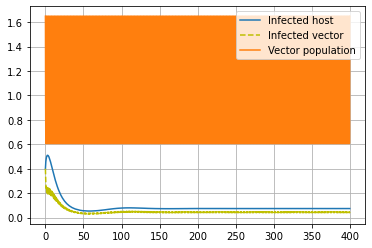

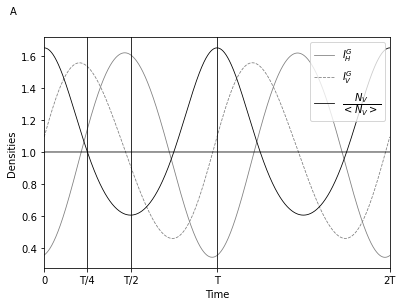

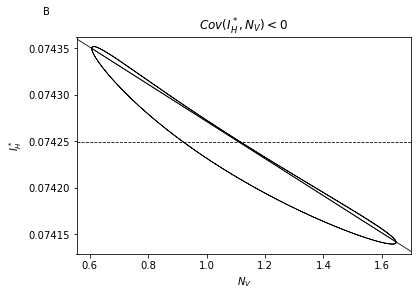

In [7]:
rossmalariamerge(epsilon=0.5,muv=1,muh=0.01,delta=1,bprime=0,rh=0.1, T=1,a0=1,ra=1) 

## Model II 

In [8]:
#19/10/2021
# We assume N_H=1
#a(t):=a*beta_{HV}
#ra=beta_{VH}/beta_{HV}

#bta=a*muvh
#betaprime=a*muhv

l=100
k=l+2

def rossmalariaII(epsilon=1,muv=1,muh=1,delta=1,bprime=1,rh=1, T=1,a0=1,ra=2):
    w=2*np.pi/T
    def f(t):
        return(np.cos(2*pi*t/T))  
    def rho(t):                                                        # Malaria model 
        return(muv-epsilon*delta*w*(np.sin(w*t))/(1+epsilon*delta*np.cos(w*t)))
    def NV(t):
        return (2*(1+epsilon*f(t)*delta))
    def a(t):
        return(a0*(1+epsilon*f(t)*bprime))        

    def msisi(x,t):   # The original system 
        return(-ra*a(t)*x[4]*x[0]+muh*(x[1]+x[2]),
               ra*a(t)*x[4]*x[0]-(muh+rh)*x[1],
               rh*x[1]-muh*x[2],
               rho(t)*(x[3]+x[4])-muv*x[3]-a(t)*x[1]*x[3],
               -muv*x[4]+a(t)*x[1]*x[3])

    step=0.0002
    time=np.arange(0,l*T,step)
    timee=np.arange(l*T,k*T,step)
    a_value=np.zeros(len(timee))
    NV_value=np.zeros(len(timee))
    for i in range(len(timee)):
        a_value[i]=a(timee[i])
        NV_value[i]=NV(timee[i])
    timerad=np.linspace(0,T,T*100)
    
    y0=[0.5,0.4,0.1,0.6,0.4]                      # Initial condition ( initial values)
#    z0=np.array(odeint(msisi,y0,time))      # Solution of the system with initial condition y0
    z0=np.array(odeint(msisi,y0,time))      # Solution of the system with initial condition y0
    y1=[z0[-1,0],z0[-1,1],z0[-1,2],z0[-1,3],z0[-1,4]]   #   Initial condition with the interval time starting from l*T
    z1=np.array(odeint(msisi,y1,timee))     # Solution of the system with initial condition y1 during interval time "timee"
#    print(z0)
    see=1;
    see1=1
    if see:
        fig,ax=plt.subplots()
#        plt.plot(time,z0[:,0],label='Suseptible host')
        plt.plot(time,z0[:,1],label='$I_{H}$')
#        plt.plot(time,z0[:,2],label='Recovered host')        
#        plt.plot(time,z0[:,3],'b--',label='Suseptible vector')
        plt.plot(time,z0[:,4],'y--',label='$I_{V}$')
#        plt.plot(time,NV(time),label="$N_{V}$")
        plt.plot(time,a(time),label="$a(t)$")
#        plt.plot(time,z0[:,4]+z0[:,3],'r--',label='Number of vector')
#        plt.xlim((l-2)*T, l*T)
        plt.legend()
        plt.grid()
            
            
        fig, lax=plt.subplots()
        ax=lax
        ihmean=0
        ivmean=0
        for i in range(len(timee)):
            ihmean=ihmean+z1[i,1]
            ivmean=ivmean+z1[i,4]
        ihmean=ihmean/len(timee)
        ivmean=ivmean/len(timee)        
#        ax.text(-0.1, 1.1, string.ascii_uppercase[0]+")",
#transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase
#        plt.plot(timee,z1[:,0])
        ax.plot(timee,1+(z1[:,1]-ihmean)*55,'k--',label='$\dfrac{I_{H}}{<I_{H}>}$')
#        plt.plot(timee,z1[:,2])      
#        plt.plot(timee,z1[:,3])
        ax.plot(timee,1+(z1[:,4]-ivmean)*45,'k-.',label='$\dfrac{I_{V}}{<I_{V}>}$')
#        ax.plot(timee,a(timee),'k')#,label='$\dfrac{a(t)}{<a(t)>}$')
        sticklabel=['0','T/4','T/2' ,'T', '3T/2','2T']
        stick=[l*T,(l+0.25)*T ,(l+0.5)*T,(l+1)*T,(l+1.5)*T, (l+2)*T]
        ax.set_xticks(stick)
        ax.set_xticklabels(sticklabel)
#        plt.plot(timee,NV(timee), label="$N_{V}$")
#        plt.xlim(10,50)
#        plt.ylim(0,0.002)
        plt.legend()
        plt.grid()
        plt.title("$\mu_{H}=$"+str(muh)+"$, \mu_{V}=$"+str(muv)+"$, \gamma_{H}=$"+str(rh))
        ax.text(-0.1, 1.1, string.ascii_uppercase[0]+":$ \mu_{V}>\mu_{H}+\gamma_{H}$",transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase
        plt.savefig("showIImuvp.pdf",bbox_inches='tight' );
        
        #fix,ax=plt.subplots()
        #plt.plot(a(timee), z1[:,1], 'y--')
        #covaih=np.cov(a(timee), z1[:,1])[0,1]
        #covaiv=np.cov(a(timee), z1[:,4])[0,1]
        #covivih=np.cov(z1[:,1], z1[:,4])[0,1]
        #print(covaih)
        #print(covaiv)
        #print(covivih)
        #plt.grid()
#        plt.savefig("showIImuvnb.pdf",bbox_inches='tight' );
        #fix,ax=plt.subplots()
#        plt.plot(a(timee), z1[:,4])
        #plt.grid()
#        plt.savefig("showIImuvnc.pdf",bbox_inches='tight' );
        

#### $\mu_{H}+\gamma_{H}<\mu_{V}$

In [9]:
#19/10/2021
# We assume N_H=1
#a(t):=a*beta_{HV}
#ra=beta_{VH}/beta_{HV}

#bta=a*muvh
#betaprime=a*muhv

l=50
k=l+2
vscl=58
hscl=150
def rossmalariaIIp(epsilon=1,muv=1,muh=1,delta=1,bprime=1,rh=1, T=1,a0=1,ra=2):
    w=2*np.pi/T
    def f(t):
        return(np.cos(2*pi*t/T))  
    def rho(t):                                                        # Malaria model 
        return(muv-epsilon*delta*w*(np.sin(w*t))/(1+epsilon*delta*np.cos(w*t)))
    def NV(t):
        return (2*(1+epsilon*f(t)*delta))
    def a(t):
        return(a0*(1+epsilon*f(t)*bprime))        

    def msisi(x,t):   # The original system 
        return(-ra*a(t)*x[4]*x[0]+muh*(x[1]+x[2]),
               ra*a(t)*x[4]*x[0]-(muh+rh)*x[1],
               rh*x[1]-muh*x[2],
               rho(t)*(x[3]+x[4])-muv*x[3]-a(t)*x[1]*x[3],
               -muv*x[4]+a(t)*x[1]*x[3])

    step=0.0001
    time=np.arange(0,l*T,step)
    timee=np.arange(l*T,k*T,step)
    a_value=np.zeros(len(timee))
    NV_value=np.zeros(len(timee))
    for i in range(len(timee)):
        a_value[i]=a(timee[i])
        NV_value[i]=NV(timee[i])
    timerad=np.linspace(0,T,T*100)
    
    y0=[0.5,0.4,0.1,1.1,0.9]                      # Initial condition ( initial values)
#    z0=np.array(odeint(msisi,y0,time))      # Solution of the system with initial condition y0
    z0=np.array(odeint(msisi,y0,time))      # Solution of the system with initial condition y0
    y1=[z0[-1,0],z0[-1,1],z0[-1,2],z0[-1,3],z0[-1,4]]   #   Initial condition with the interval time starting from l*T
    z1=np.array(odeint(msisi,y1,timee))     # Solution of the system with initial condition y1 during interval time "timee"
#    print(z0)
    see=1;
    see1=1
    if see:
        fig,ax=plt.subplots()
        plt.plot(time,z0[:,0],label='$S_{H}$')
        plt.plot(time,z0[:,1],label='$I_{H}$')
        plt.plot(time,z0[:,2],label='$R_{H}$')        
        plt.plot(time,z0[:,3],'b',label='$S_{V}$')
        plt.plot(time,z0[:,4],'y',label='$I_{V}$')
#        plt.plot(time,NV(time),label="$N_{V}$")
#        plt.plot(time,a(time),label="$a(t)$")
#        plt.plot(time,z0[:,4]+z0[:,3],'r--',label='Number of vector')
#        plt.plot(time,z0[:,0]+z0[:,1]+z0[:,2],'r--',label='Number of host')
    
#        plt.xlim((l-2)*T, l*T)
        plt.legend()
        plt.grid()
            
            
        fig, lax=plt.subplots()
        ax=lax
        ihmean=0
        ivmean=0
        for i in range(len(timee)):
            ihmean=ihmean+z1[i,1]
            ivmean=ivmean+z1[i,4]
        ihmean=ihmean/len(timee)
        ivmean=ivmean/len(timee)  
        print("$I_{H},I_{V}$",ihmean, ivmean)
#        ax.text(-0.1, 1.1, string.ascii_uppercase[0]+")",
#transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase
#        plt.plot(timee,z1[:,0])
        ax.plot(timee,1+(z1[:,1]-ihmean)*hscl,color='gray',label='$\dfrac{I_{H}}{<I_{H}>}$')
#        ax.text((l+0.3)*T, 2, r'$I_{H}$', fontdict=font)
#        plt.plot(timee,z1[:,2])      
#        plt.plot(timee,z1[:,3])
        ax.plot(timee,1+(z1[:,4]-ivmean)*vscl,'--', color='gray',label='$\dfrac{I_{V}}{<I_{V}>}$')
#        ax.text((l+0.15)*T, 2, r'$I_{V}$', fontdict=font)
#        ax.arrow((l+0.2)*T,2.05,0.05,0,width=.01, edgecolor='green',facecolor='gray',linestyle='--',linewidth=0.01)
        ax.plot(timee,a(timee),'k',label='$\dfrac{a(t)}{<a(t)>}$')
#        ax.text((l)*T, 2, r'$a$', fontdict=font)
        ax.plot(timee, 1+np.zeros(len(timee)))
        sticklabel=['0','T/4','T/2' ,'T', '3T/2','2T']
        stick=[l*T,(l+0.25)*T ,(l+0.5)*T,(l+1)*T,(l+1.5)*T, (l+2)*T]
        ax.set_xticks(stick)
        ax.set_xticklabels(sticklabel)
#        ax.plot([], [],' ', label="$\mu_{H}=$"+str(muh)+"$, \gamma_{H}=$"+str(rh)+"$, \mu_{V}=$"+str(muv))

        plt.axvline(x=(l+1/4)*T, color='black', linewidth=0.8)
        plt.axvline(x=(l+1/2)*T, color='black', linewidth=0.8)
        plt.axvline(x=(l+1)*T, color='black', linewidth=0.8) 
        plt.title("$ \mu_{V}>\mu_{H}+\gamma_{H}$")
        plt.xlabel('Time')
        plt.ylabel('Biting rate and densities')         
        
        plt.legend(loc=1)
#        ax.text((l+0.5)*T, 1.52, r"$\mu_{H}=$"+str(muh)+"$, \mu_{V}=$"+str(muv)+"$, \gamma_{H}=$"+str(rh), fontdict=font)
        plt.ylim([0,2.2])
        plt.xlim([l*T,(l+2)*T])
#        plt.title("$\mu_{H}=$"+str(muh)+"$, \mu_{V}=$"+str(muv)+"$, \gamma_{H}=$"+str(rh))
        ax.text(-0.1, 1.1, string.ascii_uppercase[0],transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase
        plt.savefig("showIImuvp.pdf",bbox_inches='tight' );
        

$I_{H},I_{V}$ 0.03565331738332799 0.13287950527259118


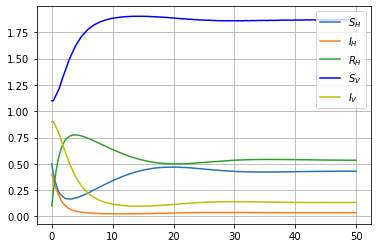

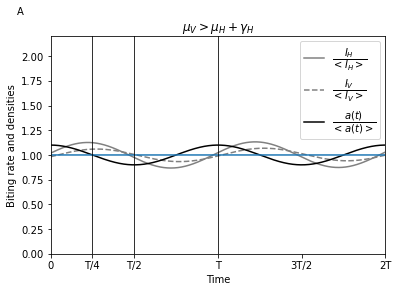

In [10]:
# muv=1, muh=0.6, rh=0.1 , ih,iv =55,45
#rossmalariaIIp(epsilon=0.5,muv=0.8,muh=0.1,delta=0,bprime=1,rh=0.4, T=1,a0=1,ra=1)  # muv=0.8, muh=0.1, rh=0.4 , ih,iv =112,65
#rossmalariaIIp(epsilon=0.5,muv=0.5,muh=0.1,delta=0,bprime=1,rh=0.15, T=1,a0=1,ra=1)  # muv=0.5, muh=0.1, rh=0 , ih,iv =27,20.5
rossmalariaIIp(epsilon=0.1,muv=0.5,muh=0.1,delta=0,bprime=1,rh=1.5, T=1,a0=1,ra=1)  # muv=0.5, muh=0.1, rh=0 , ih,iv =145,28

#### $\mu_{H}+\gamma_{H}=\mu_{V}$

In [11]:
#19/10/2021
# We assume N_H=1
#a(t):=a*beta_{HV}
#ra=beta_{VH}/beta_{HV}

#bta=a*muvh
#betaprime=a*muhv

l=100
k=l+2
scl=4

def rossmalariaII0(epsilon=1,muv=1,muh=1,delta=1,bprime=1,rh=1, T=1,a0=1,ra=2):
    w=2*np.pi/T
    def f(t):
        return(np.cos(2*pi*t/T))  
    def rho(t):                                                        # Malaria model 
        return(muv-epsilon*delta*w*(np.sin(w*t))/(1+epsilon*delta*np.cos(w*t)))
    def NV(t):
        return (1*(1+epsilon*f(t)*delta))
    def a(t):
        return(a0*(1+epsilon*f(t)*bprime))        

    def msisi(x,t):   # The original system 
        return(-ra*a(t)*x[4]*x[0]+muh*(x[1]+x[2]),
               ra*a(t)*x[4]*x[0]-(muh+rh)*x[1],
               rh*x[1]-muh*x[2],
               rho(t)*(x[3]+x[4])-muv*x[3]-a(t)*x[1]*x[3],
               -muv*x[4]+a(t)*x[1]*x[3])

    step=0.0001
    time=np.arange(0,l*T,step)
    timee=np.arange(l*T,k*T,step)
    a_value=np.zeros(len(timee))
    NV_value=np.zeros(len(timee))
    for i in range(len(timee)):
        a_value[i]=a(timee[i])
        NV_value[i]=NV(timee[i])
    timerad=np.linspace(0,T,T*100)
    
    y0=[0.5,0.4,0.1,1.1,0.9]                      # Initial condition ( initial values)
#    z0=np.array(odeint(msisi,y0,time))      # Solution of the system with initial condition y0
    z0=np.array(odeint(msisi,y0,time))      # Solution of the system with initial condition y0
    y1=[z0[-1,0],z0[-1,1],z0[-1,2],z0[-1,3],z0[-1,4]]   #   Initial condition with the interval time starting from l*T
    z1=np.array(odeint(msisi,y1,timee))     # Solution of the system with initial condition y1 during interval time "timee"
#    print(z0)
    see=1;
    see1=1
    if see:
        fig,ax=plt.subplots()
#        plt.plot(time,z0[:,0],label='Suseptible host')
        plt.plot(time,z0[:,1],label='$I_{H}$')
#        plt.plot(time,z0[:,2],label='Recovered host')        
#        plt.plot(time,z0[:,3],'b--',label='Suseptible vector')
        plt.plot(time,z0[:,4],'y--',label='$I_{V}$')
#        plt.plot(time,NV(time),label="$N_{V}$")
        plt.plot(time,a(time),label="$a(t)$")
        ax.plot(timee, 1+np.zeros(len(timee)))
#        plt.plot(time,z0[:,4]+z0[:,3],'r--',label='Number of vector')
#        plt.xlim((l-2)*T, l*T)
        plt.legend()
        plt.grid()
            
            
        fig, lax=plt.subplots()
        ax=lax
        ihmean=0
        ivmean=0
        for i in range(len(timee)):
            ihmean=ihmean+z1[i,1]
            ivmean=ivmean+z1[i,4]
        ihmean=ihmean/len(timee)
        ivmean=ivmean/len(timee)  
        print("$I_{H},I_{V}$",ihmean, ivmean)
#        ax.text(-0.1, 1.1, string.ascii_uppercase[0]+")",
#transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase
#        plt.plot(timee,z1[:,0])
        ax.plot(timee,1+(z1[:,1]/ihmean-1)*scl, color='gray')#label='$\dfrac{I_{H}}{<I_{H}>}$')
        ax.text((l+0.15)*T, 1.55, r'$I_{H}$', fontdict=font)
#        plt.plot(timee,z1[:,2])      
#        plt.plot(timee,z1[:,3])
        ax.plot(timee,1+(z1[:,4]/ivmean-1)*scl,'--', color='gray')#,label='$\dfrac{I_{V}}{<I_{V}>}$')
        ax.text((l+0.28)*T, 1.55, r'$I_{V}$', fontdict=font)
        ax.plot(timee,a(timee),'k')#,label='$\dfrac{a(t)}{<a(t)>}$')
        ax.plot(timee, 1+np.zeros(len(timee)))
        ax.text((l)*T, 1.55, r'$a$', fontdict=font)
        sticklabel=['0','T/4','T/2' ,'T', '3T/2','2T']
        stick=[l*T,(l+0.25)*T ,(l+0.5)*T,(l+1)*T,(l+1.5)*T, (l+2)*T]
        ax.set_xticks(stick)
        ax.set_xticklabels(sticklabel)
        plt.title("$ \mu_{V}=\mu_{H}+\gamma_{H}$")

#        ax.plot([], [],' ', label="$\mu_{H}=$"+str(muh)+"$, \gamma_{H}=$"+str(rh)+"$, \mu_{V}=$"+str(muv))

        plt.axvline(x=(l+1/4)*T, color='black', linewidth=0.8)
        plt.axvline(x=(l+1/2)*T, color='black', linewidth=0.8)
        plt.axvline(x=(l+1)*T, color='black', linewidth=0.8) 
        plt.xlabel('Time')
        plt.ylabel('Biting rate and densities')
       
        
#        plt.legend(loc=1)

        plt.ylim([0.4,1.68])
        plt.xlim([l*T,(l+2)*T])
#        plt.title("$\mu_{H}=$"+str(muh)+"$, \mu_{V}=$"+str(muv)+"$, \gamma_{H}=$"+str(rh))
        ax.text(-0.1, 1.1, string.ascii_uppercase[1],transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase
        plt.savefig("showIImuv0.pdf",bbox_inches='tight' );
        

$I_{H},I_{V}$ 0.018967332865236865 0.07262039452688199


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


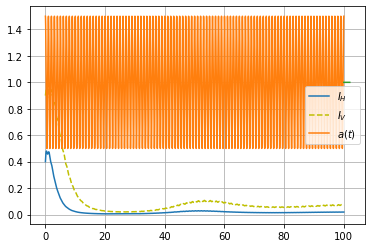

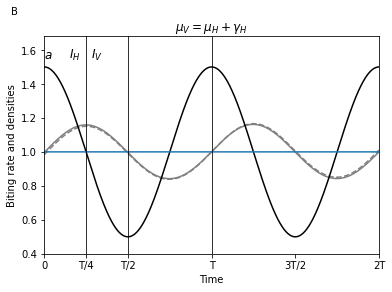

In [12]:
#muv=0.3, muh=0.2, rh=0.1 ,ih,iv =30,40
#rossmalariaII0(epsilon=0.5,muv=0.8,muh=0.1,delta=0,bprime=1,rh=0.7, T=1,a0=1,ra=1)  #muv=0.8, muh=0.1, rh=0.7 ,ih,iv =188,160
#rossmalariaII0(epsilon=0.5,muv=0.5,muh=0.1,delta=0,bprime=1,rh=0.4, T=1,a0=1,ra=1)  #muv=0.5, muh=0.1, rh=0.4 ,ih,iv =90,58
rossmalariaII0(epsilon=0.5,muv=0.5,muh=0.01,delta=0,bprime=1,rh=0.49, T=1,a0=1,ra=1)  #muv=0.5, muh=0.05, rh=0.4 ,ih,iv =90,58

#### $\mu_{H}+\gamma_{H}>\mu_{V}$

In [13]:
#19/10/2021
# We assume N_H=1
#a(t):=a*beta_{HV}
#ra=beta_{VH}/beta_{HV}

#bta=a*muvh
#betaprime=a*muhv

l=500
k=l+2
hscl=90
vscl=58
def rossmalariaIIn(epsilon=1,muv=1,muh=1,delta=1,bprime=1,rh=1, T=1,a0=1,ra=2):
    w=2*np.pi/T
    def f(t):
        return(np.cos(2*pi*t/T))  
    def rho(t):                                                        # Malaria model 
        return(muv-epsilon*delta*w*(np.sin(w*t))/(1+epsilon*delta*np.cos(w*t)))
    def NV(t):
        return (2*(1+epsilon*f(t)*delta))
    def a(t):
        return(a0*(1+epsilon*f(t)*bprime))        

    def msisi(x,t):   # The original system 
        return(-ra*a(t)*x[4]*x[0]+muh*(x[1]+x[2]),
               ra*a(t)*x[4]*x[0]-(muh+rh)*x[1],
               rh*x[1]-muh*x[2],
               rho(t)*(x[3]+x[4])-muv*x[3]-a(t)*x[1]*x[3],
               -muv*x[4]+a(t)*x[1]*x[3])

    step=0.0002
    time=np.arange(0,l*T,step)
    timee=np.arange(l*T,k*T,step)
    a_value=np.zeros(len(timee))
    NV_value=np.zeros(len(timee))
    for i in range(len(timee)):
        a_value[i]=a(timee[i])
        NV_value[i]=NV(timee[i])
    timerad=np.linspace(0,T,T*100)
    
#    y0=[0.5,0.4,0.1,0.6,0.4]                      # Initial condition ( initial values)
    y0=[0.5,0.4,0.1,1.1,0.9]                      # Initial condition ( initial values)
#    z0=np.array(odeint(msisi,y0,time))      # Solution of the system with initial condition y0
    z0=np.array(odeint(msisi,y0,time))      # Solution of the system with initial condition y0
    y1=[z0[-1,0],z0[-1,1],z0[-1,2],z0[-1,3],z0[-1,4]]   #   Initial condition with the interval time starting from l*T
    z1=np.array(odeint(msisi,y1,timee))     # Solution of the system with initial condition y1 during interval time "timee"
#    print(z0)
    see=1;
    see1=1
    if see:
        fig,ax=plt.subplots()
#        plt.plot(time,z0[:,0],label='Suseptible host')
##        plt.plot(time,z0[:,1],label='$I_{H}$')
#        plt.plot(time,z0[:,2],label='Recovered host')        
#        plt.plot(time,z0[:,3],'b--',label='Suseptible vector')
        plt.plot(time,z0[:,4],'y--',label='$I_{V}$')
#        plt.plot(time,NV(time),label="$N_{V}$")
        plt.plot(time,a(time),label="$a(t)$")
        ax.plot(timee, 1+np.zeros(len(timee)))
#        plt.plot(time,z0[:,4]+z0[:,3],'r--',label='Number of vector')
#        plt.xlim((l-2)*T, l*T)
        plt.legend()
        plt.grid()
            
            
        fig, lax=plt.subplots()
        ax=lax
        ihmean=0
        ivmean=0
        for i in range(len(timee)):
            ihmean=ihmean+z1[i,1]
            ivmean=ivmean+z1[i,4]
        ihmean=ihmean/len(timee)
        ivmean=ivmean/len(timee)   
        print("$I_{H},I_{V}$",ihmean, ivmean)
#        ax.text(-0.1, 1.1, string.ascii_uppercase[0]+")",
#transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase
#        plt.plot(timee,z1[:,0])
#        ax.plot(timee,1+(z1[:,1]-ihmean)*200,color='gray',label='$\dfrac{I_{H}}{<I_{H}>}$')
        ax.plot(timee,1+(z1[:,1]-ihmean)*hscl,color='gray',label='$\dfrac{I_{H}}{<I_{H}>}$')
#        ax.text((l+0.15)*T, 1.55, r'$I_{H}$', fontdict=font)
#        plt.plot(timee,z1[:,2])      
#        plt.plot(timee,z1[:,3])
#        ax.plot(timee,1+(z1[:,4]-ivmean)*100,'--', color='gray')#,label='$\dfrac{I_{V}}{<I_{V}>}$')
        ax.plot(timee,1+(z1[:,4]-ivmean)*vscl,'--', color='gray',label='$\dfrac{I_{V}}{<I_{V}>}$')
#        ax.text((l+0.3)*T, 1.55, r'$I_{V}$', fontdict=font)
#        ax.arrow((l+0.2)*T,1.55,0.05,0,width=.01, edgecolor='green',facecolor='gray',linestyle='--',linewidth=0.01)
        ax.plot(timee,a(timee),'k',label='$\dfrac{a(t)}{<a(t)>}$')
        ax.plot(timee, 1+np.zeros(len(timee)))
#        ax.text((l)*T, 1.55, r'$a$', fontdict=font)
        
        
        sticklabel=['0','T/4','T/2' ,'T', '3T/2','2T']
        stick=[l*T,(l+0.25)*T ,(l+0.5)*T,(l+1)*T,(l+1.5)*T, (l+2)*T]
        ax.set_xticks(stick)
        ax.set_xticklabels(sticklabel)
#        ax.plot([], [],' ', label="$\mu_{H}=$"+str(muh)+"$, \gamma_{H}=$"+str(rh)+"$, \mu_{V}=$"+str(muv))
        plt.title("$ \mu_{V}<\mu_{H}+\gamma_{H}$")

        plt.axvline(x=(l+1/4)*T, color='black', linewidth=0.8)
        plt.axvline(x=(l+1/2)*T, color='black', linewidth=0.8)
        plt.axvline(x=(l+1)*T, color='black', linewidth=0.8)
        plt.xlabel('Time')
        plt.ylabel('Biting rate and densities')
        
        plt.legend(loc=1)

        plt.ylim([0.4,1.68])
        plt.xlim([l*T,(l+2)*T])
#        plt.title("$\mu_{H}=$"+str(muh)+"$, \mu_{V}=$"+str(muv)+"$, \gamma_{H}=$"+str(rh))
        ax.text(-0.1, 1.1, string.ascii_uppercase[2],transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase
        plt.savefig("showIImuvn.pdf",bbox_inches='tight' );
        

$I_{H},I_{V}$ 0.03580354922374676 0.13434227789545886


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


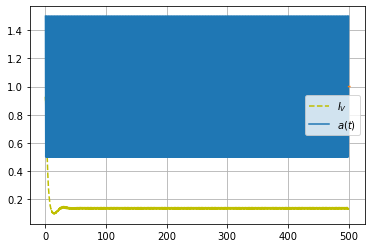

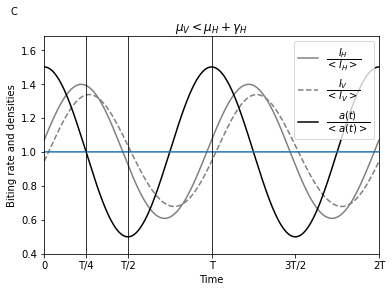

In [14]:
#muv=0.2, muh=0.5, rh=0.3 ,ih,iv =22,45
#muv=0.8, muh=0.1, rh=1 ,ih,iv =550,600
#rossmalariaIIn(epsilon=0.5,muv=0.5,muh=0.1,delta=0,bprime=1,rh=1, T=1,a0=1,ra=1)   #muv=0.5, muh=0.1, rh=1 ,ih,iv =155,175
#rossmalariaIIn(epsilon=0.5,muv=0.5,muh=0.1,delta=0,bprime=1,rh=1.5, T=1,a0=1,ra=1)   #muv=0.5, muh=0.1, rh=0 ,ih,iv =350,500
rossmalariaIIn(epsilon=0.5,muv=0.5,muh=0.1,delta=0,bprime=1,rh=1.5, T=1,a0=1,ra=1)   #muv=0.5, muh=0.1, rh=0 ,ih,iv =350,500

#### Test

##### $\mu_{H}+\gamma_{H}<\mu_{V}$

$I_{H},I_{V}$ 0.021781193633338043 0.08348414836063864


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


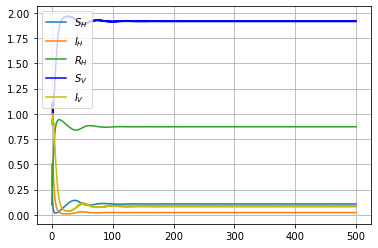

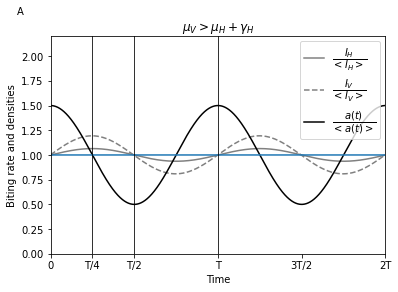

In [15]:
#rossmalariaIIp(epsilon=0.5,muv=1,muh=0.25,delta=0,bprime=1,rh=0.6, T=1,a0=1,ra=1)   #muv=0.2, muh=0.5, rh=0.3 ,ih,iv =22,45
rossmalariaIIp(epsilon=0.5,muv=0.5,muh=0.01,delta=0,bprime=1,rh=0.4, T=1,a0=1,ra=1)  # muv=0.8, muh=0.1, rh=0.4 , ih,iv =112,65

##### $\mu_{H}+\gamma_{H}=\mu_{V}$

$I_{H},I_{V}$ 0.08096056686275278 0.18383929778847122


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


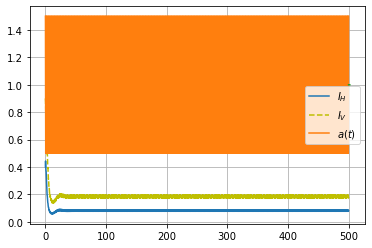

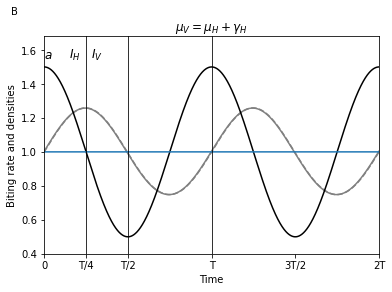

In [16]:
#muv=0.2, muh=0.5, rh=0.3 ,ih,iv =22,45
#rossmalariaII0(epsilon=0.5,muv=1,muh=0.25,delta=0,bprime=1,rh=0.75, T=1,a0=1,ra=1)   
rossmalariaII0(epsilon=0.5,muv=0.8,muh=0.1,delta=0,bprime=1,rh=0.7, T=1,a0=1,ra=1)  #muv=0.3, muh=0.2, rh=0.1 ,ih,iv =188,168

##### $\mu_{H}+\gamma_{H}>\mu_{V}$

$I_{H},I_{V}$ 0.048501045465826634 0.11445225799714148


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


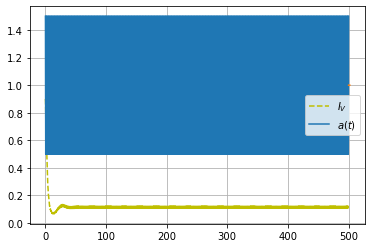

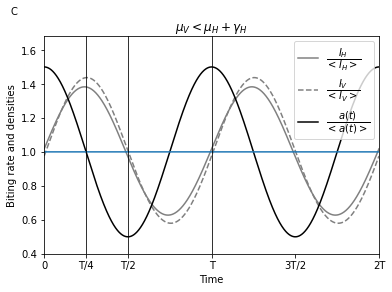

In [17]:
#rossmalariaIIn(epsilon=0.5,muv=1,muh=0.25,delta=0,bprime=1,rh=0.8, T=1,a0=1,ra=1)   #muv=0.2, muh=0.5, rh=0.3 ,ih,iv =22,45
rossmalariaIIn(epsilon=0.5,muv=0.8,muh=0.1,delta=0,bprime=1,rh=1, T=1,a0=1,ra=1)     #muv=0.2, muh=0.5, rh=0.3 ,ih,iv =550,600

### General model

In [18]:
#19/10/2021
# We assume N_H=1
#a(t):=a*beta_{HV}
#ra=beta_{VH}/beta_{HV}

#bta=a*muvh
#betaprime=a*muhv

l=1200
k=l+2
def rossmalariagen(epsilon=1,muv=1,muh=1,delta=1,bprime=1,rh=1, T=1,a0=1,ra=2, vscl=58, hscl=150,voir=0):
    widthline=0.8
    w=2*np.pi/T
    def f(t):
        return(np.cos(2*pi*t/T))  
    def rho(t):                                                        # Malaria model 
        return(muv-epsilon*delta*w*(np.sin(w*t))/(1+epsilon*delta*np.cos(w*t)))
#    def NV(t):
#        return (2*(1+epsilon*f(t)*delta))
    def a(t):
        return(a0*(1+epsilon*f(t)*bprime))        

    def msisi(x,t):   # The original system 
        return(-ra*a(t)*x[4]*x[0]+muh*(x[1]+x[2]),
               ra*a(t)*x[4]*x[0]-(muh+rh)*x[1],
               rh*x[1]-muh*x[2],
               rho(t)*(x[3]+x[4])-muv*x[3]-a(t)*x[1]*x[3],
               -muv*x[4]+a(t)*x[1]*x[3])

    step=0.001
    time=np.arange(0,l*T,step)
    timee=np.arange(l*T,k*T,step)
    a_value=np.zeros(len(timee))
#    NV_value=np.zeros(len(timee))
#    for i in range(len(timee)):
#        a_value[i]=a(timee[i])
#        NV_value[i]=NV(timee[i])
    timerad=np.linspace(0,T,T*100)
    
    y0=[0.5,0.4,0.1,0.7,0.3]                      # Initial condition ( initial values)
    z0=np.array(odeint(msisi,y0,time))      # Solution of the system with initial condition y0
    y1=[z0[-1,0],z0[-1,1],z0[-1,2],z0[-1,3],z0[-1,4]]   #   Initial condition with the interval time starting from l*T
    z1=np.array(odeint(msisi,y1,timee))     # Solution of the system with initial condition y1 during interval time "timee"
#    print(z0)
    see=1;
    see1=1
    if see:
        if voir:
            fig,ax=plt.subplots()
            plt.plot(time,z0[:,0],label='$S_{H}$')
            plt.plot(time,z0[:,1],label='$I_{H}$')
            plt.plot(time,z0[:,2],label='$R_{H}$')        
            plt.plot(time,z0[:,3],'b',label='$S_{V}$')
            plt.plot(time,z0[:,4],'y',label='$I_{V}$')
    #        plt.plot(time,NV(time),label="$N_{V}$")
    #        plt.plot(time,a(time),label="$a(t)$")
#            plt.plot(time,z0[:,4]+z0[:,3],'r--',label='Number of vector')
#            plt.plot(time,z0[:,0]+z0[:,1]+z0[:,2],'r--',label='Number of host')

    #        plt.xlim((l-2)*T, l*T)
            plt.legend()
            plt.grid()
            plt.savefig("densities.pdf",bbox_inches='tight' )
            
            
        fig, lax=plt.subplots()
        ax=lax
        ihmean=0
        ivmean=0
        for i in range(len(timee)):
            ihmean=ihmean+z1[i,1]
            ivmean=ivmean+z1[i,4]
        ihmean=ihmean/len(timee)
        ivmean=ivmean/len(timee)  
        print("$I_{H},I_{V}$",ihmean, ivmean)
        ax.plot(timee,1+(z1[:,1]-ihmean)*hscl,color='gray',label='$I_{H}^{G}$',linewidth=widthline)
        ax.plot(timee,1+(z1[:,4]-ivmean)*vscl,'--', color='gray',label='$I_{V}^{G}$',linewidth=widthline)
        ax.plot(timee,a(timee),'k',label='$\dfrac{a(t)}{a(0)}$', linewidth=widthline)
#        ax.plot(timee, 1+np.zeros(len(timee)), linewidth=widthline)
        sticklabel=['0','T/4','T/2' ,'T', '3T/2','2T']
        stick=[l*T,(l+0.25)*T ,(l+0.5)*T,(l+1)*T,(l+1.5)*T, (l+2)*T]
        ax.set_xticks(stick)
        ax.set_xticklabels(sticklabel)
        plt.axvline(x=(l+1/4)*T, color='black', linewidth=widthline)
        plt.axvline(x=(l+1/2)*T, color='black', linewidth=widthline)
        plt.axvline(x=(l+1)*T, color='black', linewidth=widthline) 
        plt.xlabel('Time')
        plt.ylabel('Biting rate and densities')         
        
#        plt.legend(loc=1)
        plt.legend(bbox_to_anchor=(1, 1))
#        plt.ylim([0,2.2])
        plt.xlim([l*T,(l+2)*T])
        print('muv,muh+rh=', muv,muh+rh)
        if np.abs(muv-(muh+rh))<0.001 :
            plt.title("$ \mu_{V}=\mu_{H}+\gamma_{H}$")
#            plt.title("$\mu_{H}=$"+str(muh)+"$, \gamma_{H}=$"+str(rh)+"$, \mu_{V}=$"+str(muv))
            ax.text(-0.1, 1.1, string.ascii_uppercase[1],transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase
            plt.savefig("showIImuv0.pdf",bbox_inches='tight' )
        elif muv>(muh+rh):
            plt.title("$ \mu_{V}>\mu_{H}+\gamma_{H}$")
            ax.text(-0.1, 1.1, string.ascii_uppercase[0],transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase
            plt.savefig("showIImuvp.pdf",bbox_inches='tight' )
        else: 
            plt.title("$ \mu_{V}<\mu_{H}+\gamma_{H}$")
            ax.text(-0.1, 1.1, string.ascii_uppercase[2],transform=ax.transAxes, size=10 )#,weight='bold' , ascii_uppercase
            plt.savefig("showIImuvn.pdf",bbox_inches='tight' )
        fig, ax=plt.subplots()
        ax.plot(a(timee),z1[:,1])
        ax.legend()
        fig, ax=plt.subplots()
        ax.plot(a(timee),z1[:,4])
        ax.legend()

$I_{H},I_{V}$ 0.089725035174227 0.15212289237359064
muv,muh+rh= 0.5 0.11


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


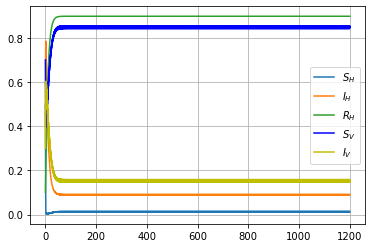

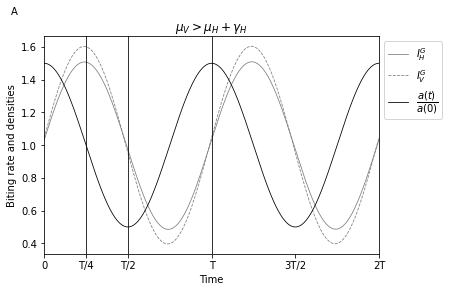

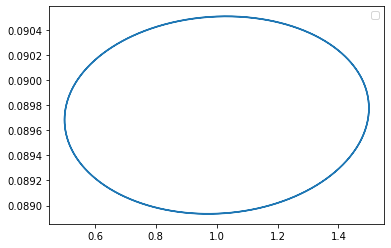

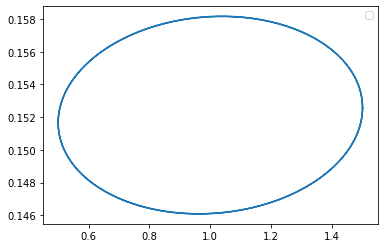

In [19]:
rossmalariagen(epsilon=0.5,muv=0.5,muh=0.01,delta=0,bprime=1,rh=0.1, T=1,a0=1,ra=5,vscl=100, hscl=650,voir=1)     #muv=0.2, muh=0.5, rh=0.3 ,ih,iv =550,600

#### Test

$I_{H},I_{V}$ 0.089725035174227 0.15212289237359064
muv,muh+rh= 0.5 0.11


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


$I_{H},I_{V}$ 0.018958340415900415 0.03653920284830021
muv,muh+rh= 0.5 0.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


$I_{H},I_{V}$ 0.0069218680263852025 0.013696905099594847
muv,muh+rh= 0.5 1.26


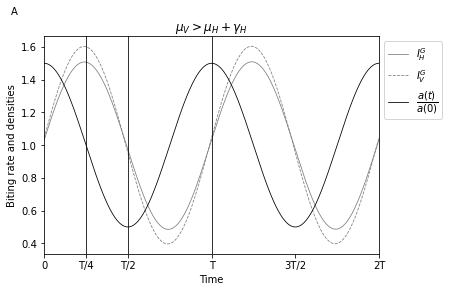

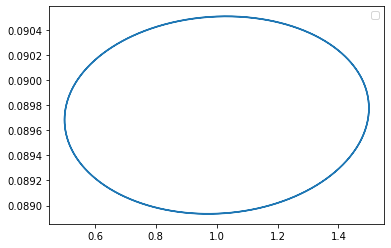

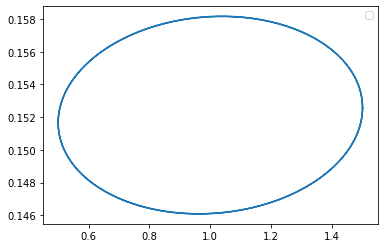

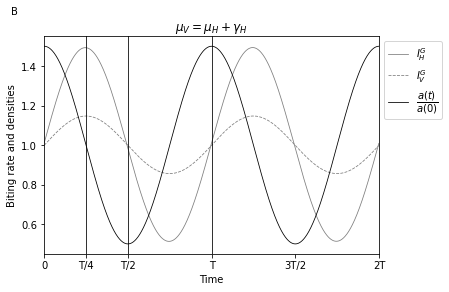

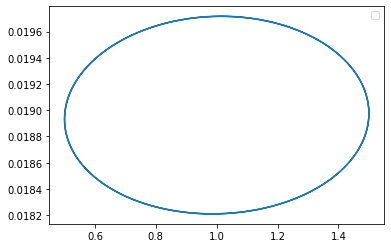

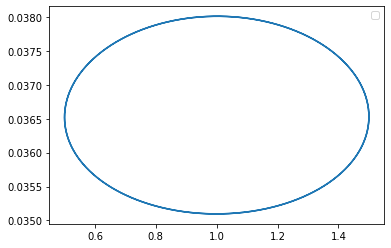

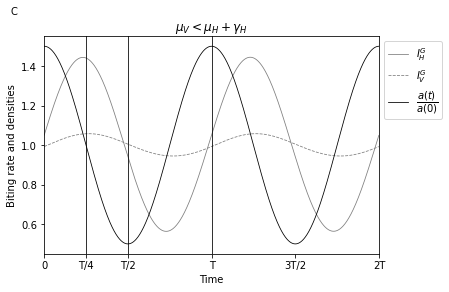

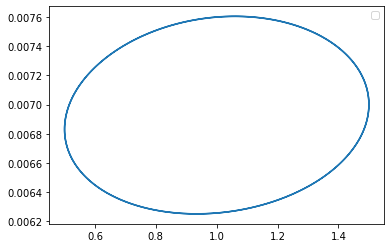

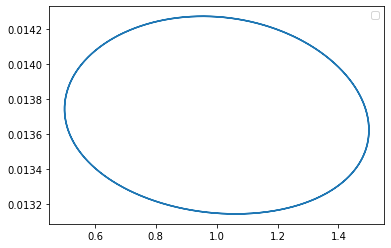

In [20]:
rossmalariagen(epsilon=0.5,muv=0.5,muh=0.01,delta=0,bprime=1,rh=0.1, T=1,a0=1,ra=5,vscl=100, hscl=650,voir=0)
rossmalariagen(epsilon=0.5,muv=0.5,muh=0.01,delta=0,bprime=1,rh=0.49,  T=1,a0=1,ra=5,vscl=100, hscl=650,voir=0)
rossmalariagen(epsilon=0.5,muv=0.5,muh=0.01,delta=0,bprime=1,rh=1.25, T=1,a0=1,ra=5,vscl=100, hscl=650,voir=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


$I_{H},I_{V}$ 0.047520770573328756 0.19199478052944324
muv,muh+rh= 0.2 0.2


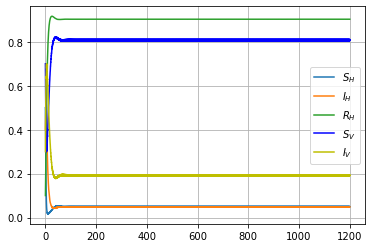

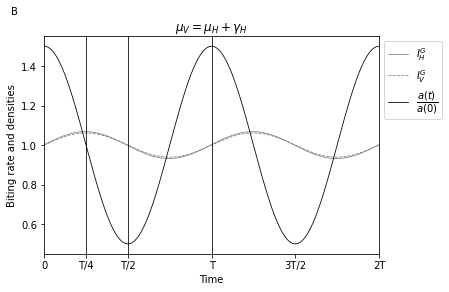

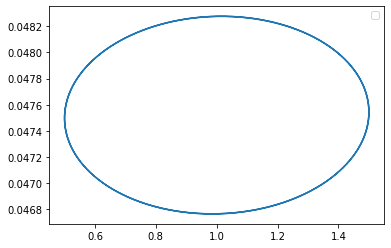

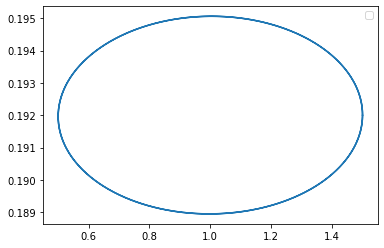

In [21]:
rossmalariagen(epsilon=0.5,muv=0.2,muh=0.01,delta=0,bprime=1,rh=0.19, T=1,a0=1,ra=1,vscl=20, hscl=90, voir=1)

In [22]:
# test

In [23]:
muv=0.5
muh=0.01
rh=0.1
T=1
epsvl=0.5
wvl=muv+muh+rh
cvl=(wvl**2)*(T/(2*pi))**2
ihfovh=-(muv-muh)*muh*(T/(2*pi))**2*epsvl/(2*cvl)
ivfovi=-(muh-muv)*muv*(T/(2*pi))**2*epsvl/(2*cvl)
print('ih=',ihfovh)
print('iv=',ivfovi)

ih= -0.0032921257726417634
iv= 0.16460628863208815


In [24]:
1/0.6-0.01

1.6566666666666667